# Cyberbullying Detection using NLP
---

![](https://images.unsplash.com/photo-1585007600263-71228e40c8d1?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1770&q=80)

# Imports
---

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

C:\Users\zakar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading the Dataset
---

In [2]:
df = pd.read_csv('dataset.csv', nrows = 40000)
df

,feature,output
0,Here at home. Neighbors pick on my family and ...,age
1,Being bullied at school: High-achieving boys u...,age
2,There was a girl in my class in 6th grade who ...,age
3,He’s probably a white gay kid from some suburb...,age
4,You are pushed ti resorting. Treating thr bull...,age
...,...,...
39995,I am right now watching Enforcers defend Chums...,other
39996,✨✨✨ misandry is not a word iOS can autocomplet...,other
39997,@Bazmati2020 @sofs_mom I think poor @Annjj is ...,other
39998,"In other words #katandandre, your food was cra...",not_cyberbullying


In [3]:
df.head()

,feature,output
0,Here at home. Neighbors pick on my family and ...,age
1,Being bullied at school: High-achieving boys u...,age
2,There was a girl in my class in 6th grade who ...,age
3,He’s probably a white gay kid from some suburb...,age
4,You are pushed ti resorting. Treating thr bull...,age


In [4]:
df.tail()

,feature,output
39995,I am right now watching Enforcers defend Chums...,other
39996,✨✨✨ misandry is not a word iOS can autocomplet...,other
39997,@Bazmati2020 @sofs_mom I think poor @Annjj is ...,other
39998,"In other words #katandandre, your food was cra...",not_cyberbullying
39999,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying


In [5]:
df.shape

(40000, 2)

# EDA
---

# 1. Handling Null Values

In [6]:
df.isna().any()

feature    False
output     False
dtype: bool

In [7]:
df.isna().sum()

feature    0
output     0
dtype: int64

# 2. Handling Duplicate Values

In [8]:
df.nunique()

feature    39864
output         6
dtype: int64

In [10]:
df['feature'].nunique()

39864

# 3. Class Distributions

In [11]:
df['output'].value_counts()

output
ethnicity            8000
gender               8000
religion             8000
age                  7999
other                7999
not_cyberbullying       2
Name: count, dtype: int64

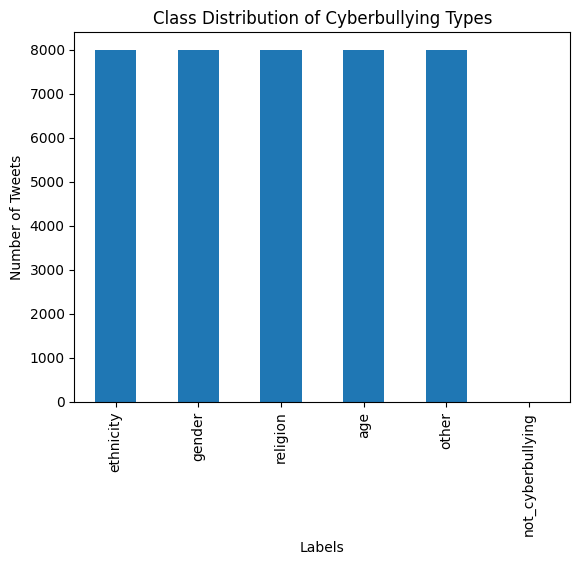

In [12]:
# Create a bar plot of the class distribution
class_counts = df['output'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

# 4. Word Count

In [13]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [15]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['feature'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [16]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [17]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 14383),
 ('school', 6459),
 ('like', 4892),
 ('high', 4610),
 ('dumb', 4373),
 ('bullied', 4209),
 ('people', 3583),
 ('RT', 3418),
 ('u', 3124),
 ('rape', 3011),
 ('fuck', 2955),
 ('gay', 2673),
 ('one', 2610),
 ('bully', 2523),
 ('ass', 2397),
 ('&amp;', 2341),
 ('nigger', 2332),
 ('You', 2328),
 ('girls', 2324),
 ('The', 2248),
 ('girl', 2245),
 ('get', 2216),
 ('jokes', 2060),
 ("I'm", 1963),
 ('black', 1857),
 ('know', 1852),
 ('think', 1782),
 ('would', 1767),
 ('white', 1626),
 ('FUCK', 1483),
 ('got', 1476),
 ('call', 1454),
 ('say', 1430),
 ('called', 1396),
 ('Muslim', 1392),
 ('make', 1367),
 ('Muslims', 1362),
 ('even', 1347),
 ('ur', 1284),
 ('never', 1245),
 ('And', 1245),
 ('fucking', 1198),
 ('still', 1191),
 ('see', 1187),
 ('This', 1157),
 ('joke', 1153),
 ('want', 1150),
 ('Christian', 1150),
 ('A', 1140),
 ('-', 1134),
 ('go', 1129),
 ('bullies', 1112),
 ('bitch', 1103),
 ('said', 1096),
 ('support', 1091),
 ('If', 1088),
 ('really', 1087),
 ('women', 1086),


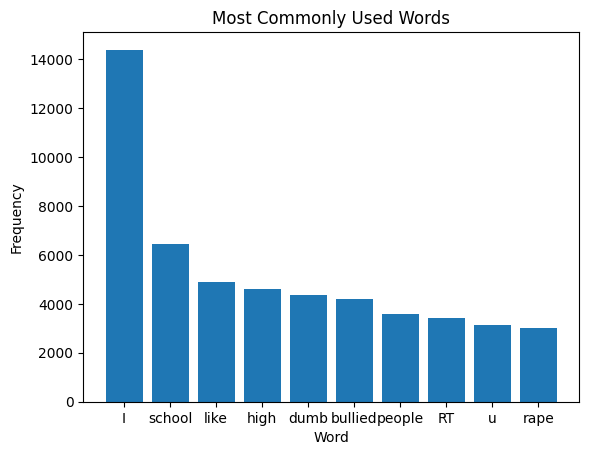

In [18]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Visualizations
---

# 1. Wordclouds

In [20]:
%pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.4 kB 651.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.4 kB 893.0 kB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


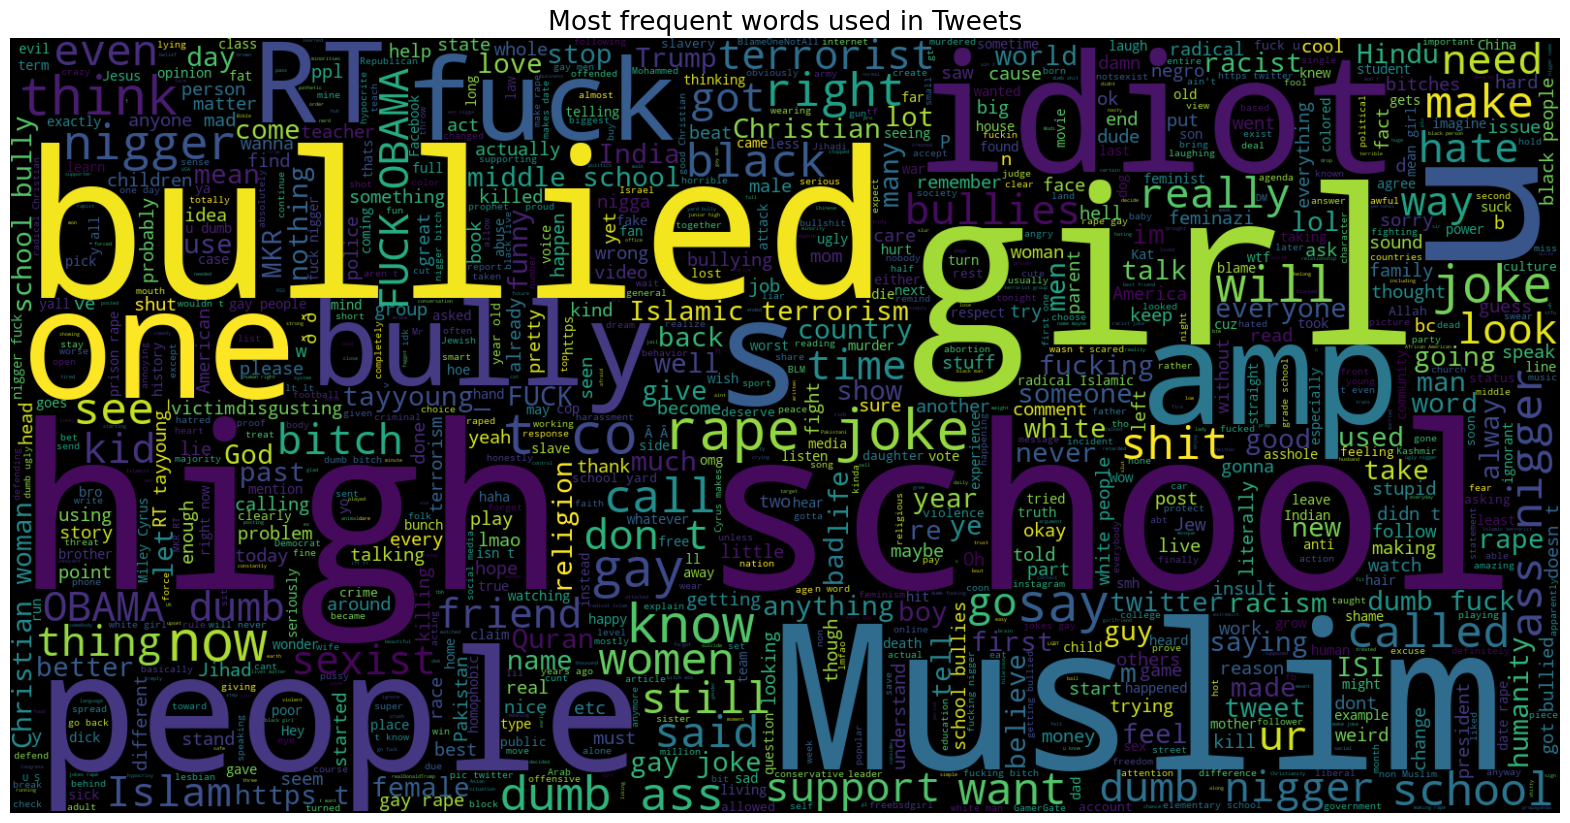

In [22]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['feature']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

# 2. Sentiment Analysis Plot

In [24]:
%pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ------ ------------------------------- 102.4/626.3 kB 837.8 kB/s eta 0:00:01
   ------------- -------------------------- 204.8/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 1.5 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/626.3 kB 1.9 MB/s eta 0:00:01
   -------------------------------- ------- 512.0/626.3 kB 1.8 MB/s eta 0:00:01
   ----------------------------------- ---- 563.2/626.3 kB 1.6 MB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated pac

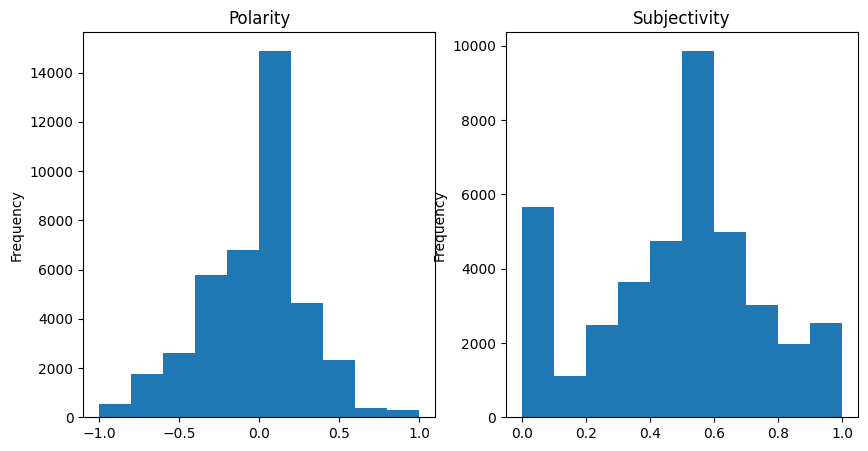

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['feature']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

# 3. Named Entity Recognition (NER) Plot

In [27]:
%pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/103.4 kB ? eta -:--:--
     --------------- ----------------------- 41.0/103.4 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 103.4/103.4 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.7 MB 7.5 MB/s eta 0:00:02
    --------------------------------------- 0.3/11.7 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.7 MB 2.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.7 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.7 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.7 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.7 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.7 MB 1.6 MB/s eta 0:00:07
   

In [28]:
import spacy
from spacy import displacy

In [29]:
#sample text
text = df['feature'].iloc[4]

#load pre-trained NER model
nlp = spacy.load('en_core_web_sm')

#perform named entity recognition
doc = nlp(text)

#visualize named entities
displacy.render(doc, style='ent', jupyter=True)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# 4. Part-of-Speech (POS) Tagging Plot

In [30]:
import spacy
from spacy import displacy

#sample text
text = df['tweet_text'].iloc[1]

#load pre-trained POS tagging model
nlp = spacy.load('en_core_web_sm')

#perform POS tagging
doc = nlp(text)

#visualize POS tagging
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

KeyError: 'tweet_text'

# 5. Topic Modeling Visualization

In [32]:
%pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numexpr-2.10.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
Using cached numexpr-2.10.0-cp312-cp312-win_amd64.whl (97 kB)
Failed to build gensim
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [714 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
      creating build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\csvcorpus.py -> bui

In [36]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build gensim
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [714 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
      creating build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\csvcorpus.py -> bui

In [35]:
import gensim
import pyLDAvis 
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

# Preprocessing
tokens = [[word for word in sentence.split()] for sentence in df['feature']]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Topic Modeling
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

ModuleNotFoundError: No module named 'gensim'

# Natural Language Processing
---

# 1. Data Cleaning

In [37]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [39]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['feature'].progress_apply(clean_text)

  0%|          | 1/40000 [00:00<01:27, 457.00it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\zakar/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.496.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.496.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.496.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\zakar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


# 2. Feature Extraction

In [61]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['cyberbullying_type']

In [62]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model
---

# 1. Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [64]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 2. Predictions

In [65]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['gender', 'not_cyberbullying', 'gender', ..., 'gender',
       'not_cyberbullying', 'gender'], dtype=object)

# 3. Accuracy Score

In [66]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.914


# 4. Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1425,  174,    3],
       [  71, 1498,   31],
       [   9,   56,  733]])

<AxesSubplot:>

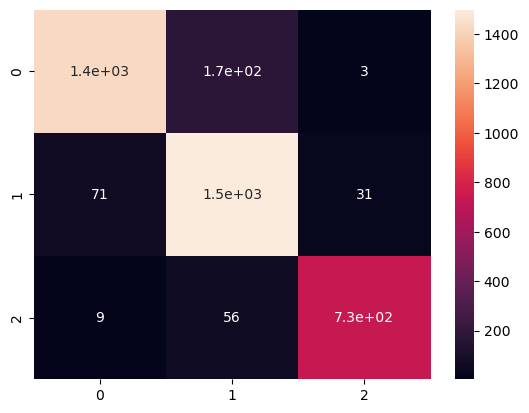

In [68]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# 5. Classification Report

In [69]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

           gender       0.95      0.89      0.92      1602
not_cyberbullying       0.87      0.94      0.90      1600
         religion       0.96      0.92      0.94       798

         accuracy                           0.91      4000
        macro avg       0.92      0.91      0.92      4000
     weighted avg       0.92      0.91      0.91      4000



# Thank You
---